In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model # Sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D # Importing different layers 
from tensorflow.keras.layers import BatchNormalization, Activation, Input, LeakyReLU
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding 
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

seed = 10

In [3]:
train_data_dir = '/Users/celia/Downloads/SMU LIT Counterfeit Products/train'
test_data_dir = "/Users/celia/Downloads/SMU LIT Counterfeit Products/test"
validation_data_dir = '/Users/celia/Downloads/SMU LIT Counterfeit Products/valid'

# Define ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(1028, 1028),  # adjust this to the input size your model expects
    batch_size=12,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(1028, 1028),  # adjust this to the input size your model expects
    batch_size=12,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(1028, 1028),  # adjust this to the input size your model expects
    batch_size=12,
    class_mode='binary')

Found 116 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [4]:
model = Sequential() ## Setting the CNN 
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same",
                activation= 'relu', batch_input_shape = (None, 1028, 1028,3))) ### Convolutional layer 1

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same",
                activation= 'relu')) ### Convolutional layer 2

model.add(MaxPool2D(pool_size=(2,2))) ## Max Pooling
model.add(Dropout(0.2)) 

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same",
                activation= 'relu')) ### Convolutional layer 3

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same",
                activation= 'relu')) ### Convolutional layer 4

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) ## Max Pooling
model.add(Dropout(0.3)) 

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "Same",
                activation= 'relu')) ### Convolutional layer 5

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "Same",
                activation= 'relu')) ### Convolutional layer 6

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) ## Max Pooling
model.add(Dropout(0.2)) 

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "Same",
                activation= 'relu')) ### Convolutional layer 7

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "Same",
                activation= 'relu')) ### Convolutional layer 8

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) ## Max Pooling
model.add(Dropout(0.3)) 

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "Same",
                activation= 'relu')) ### Convolutional layer 9

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) ## Max Pooling
model.add(Dropout(0.4)) 

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid")) ## Output layer which involves a binary classification
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1028, 1028, 32)    2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 1028, 1028, 32)    25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 514, 514, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 514, 514, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 514, 514, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 514, 514, 64)      36928     
                                                        

In [5]:
# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Setting parameters for the model compilation
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001, epsilon = 1E-08), loss = 'binary_crossentropy', metrics =['accuracy']) ## Defining above functions

# Assuming `validation_generator` is your validation data generator
history = model.fit(train_generator, epochs=80, validation_data=validation_generator, batch_size=32, callbacks=[early_stopping])

Epoch 1/80
10/10 [==============================] - 1112s 105s/step - loss: 0.7681 - accuracy: 0.5172 - val_loss: 0.6967 - val_accuracy: 0.2500
Epoch 2/80
10/10 [==============================] - 801s 80s/step - loss: 0.6969 - accuracy: 0.5603 - val_loss: 0.7067 - val_accuracy: 0.2500
Epoch 3/80
10/10 [==============================] - 789s 79s/step - loss: 0.6672 - accuracy: 0.5862 - val_loss: 0.7451 - val_accuracy: 0.2500
Epoch 4/80
10/10 [==============================] - 803s 78s/step - loss: 0.6258 - accuracy: 0.5862 - val_loss: 0.8347 - val_accuracy: 0.2500


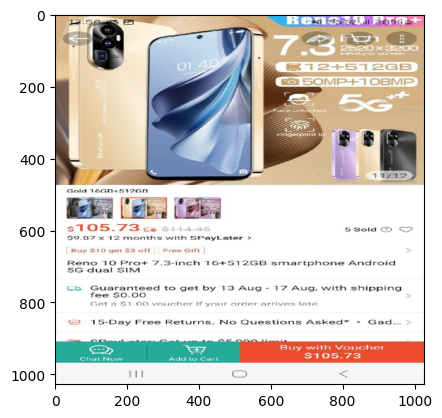

1/1 [==============================] - 1s 662ms/step


In [6]:
from tensorflow.keras.preprocessing import image

# Load the sample image
sample_image_path = '/Users/celia/Downloads/2024-08-09 13.58.41.jpg'  # Replace with the actual path to your sample image
sample_image = image.load_img(sample_image_path, target_size=(1028, 1028))

plt.imshow(sample_image)
plt.show()

# Preprocess the image
sample_image = image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)
sample_image = sample_image / 255.0

# Make predictions
predictions = model.predict(sample_image)
predicted_class = np.argmax(predictions)



In [7]:
# Setting the threshold for the prediction to be 0.5
if predictions[0] > 0.5:
    predicted_class = 1
    confidence_level = predictions[0] * 100

    print(f"The product is likely counterfeit")
    print(f"The confidence level is: {confidence_level}%")

else:
    predicted_class = 1
    print(f"The product is likely authentic")
    print(f"The confidence level is: {predictions[0][0]}%")


The product is likely counterfeit
The confidence level is: [72.359535]%


In [8]:
model.save('counterfeit_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
